<a href="https://colab.research.google.com/github/andrewsundberg/DS301/blob/master/Lab7_K_means_clustering_SudbergAndrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In the previous few sections, we have explored one category of unsupervised machine learning models: dimensionality reduction. Here we will move on to another class of unsupervised machine learning models: clustering algorithms. Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering, which is implemented in sklearn.cluster.KMeans.

We begin with the standard imports:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Introducing k-Means
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.
Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

In [0]:
random_num = np.random.randint(3,9)
print(random_num)

8


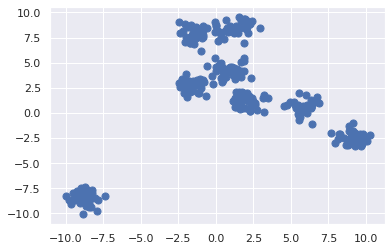

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=random_num,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [0]:
X

array([[ 2.42371514e+00,  1.45098766e+00],
       [ 1.25566754e+00,  3.38204112e+00],
       [ 2.45864438e+00,  1.14214076e+00],
       [ 6.05699576e+00,  6.63135478e-01],
       [ 5.72346856e+00,  9.33093025e-02],
       [ 8.15633274e-01,  8.25734219e+00],
       [-5.55523811e-01,  4.69595848e+00],
       [-7.47083898e-02,  8.06951601e+00],
       [-1.80022352e+00,  2.92836976e+00],
       [ 6.87413347e+00,  9.88599059e-01],
       [-8.48092169e+00, -8.19962119e+00],
       [-1.18962079e+00,  8.18523222e+00],
       [ 2.29287155e+00,  2.41826755e-01],
       [-1.01280565e+00,  2.52726691e+00],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.16051297e+00,  1.16129868e+00],
       [ 6.10895013e+00, -8.68813182e-04],
       [-1.74841312e+00,  2.77425475e+00],
       [ 2.06156753e+00,  1.96918596e+00],
       [ 6.39220383e+00,  9.27233150e-01],
       [ 6.36000042e+00,  5.08833914e-01],
       [ 1.71444449e+00,  5.02521524e+00],
       [ 5.49291353e+00,  7.39841008e-01],
       [ 1.

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

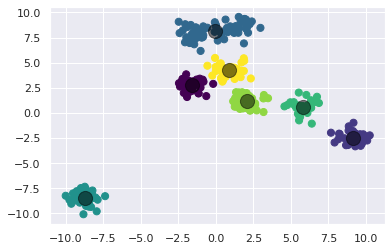

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Choosing the best value for the number of clusters by using the silhouette
score, which is the mean silhouette coefficient over all the instances.

To compute the silhouette score, you can use Scikit-Learn’s silhou
ette_score() function, giving it all the instances in the dataset, and the labels they were assigned:

In [0]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.673245529813661

In [0]:
score_list_i=[]
score_list_value=[]

for i in range(2,20):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)
  score_list_i.append(i)
  score_list_value.append(silhouette_score(X, kmeans.labels_))

In [0]:
score_list_i

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [0]:
score_list_value

[0.6658711629144707,
 0.6118837035190878,
 0.6166260760288776,
 0.6118042657150456,
 0.644053751810715,
 0.673245529813661,
 0.6823016600527666,
 0.6616061633346353,
 0.6079517064517511,
 0.5724954661976579,
 0.5362340573293225,
 0.4471547558444585,
 0.4459527282185089,
 0.38688888162581275,
 0.37432664272382626,
 0.43258435054686295,
 0.35843436643438586,
 0.4034969625313776]

Text(0, 0.5, 'silhouette score')

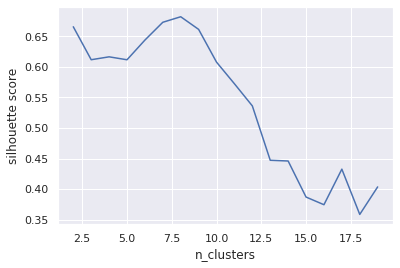

In [0]:
plt.plot(score_list_i,score_list_value)
plt.xlabel("n_clusters")
plt.ylabel("silhouette score")

##Your turn, make sure you follow instructions from
https://canvas.iastate.edu/courses/64450/assignments/931599/

use this dataset
https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/Brain-BodySize/brain-bodysize.csv

In [0]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/Brain-BodySize/brain-bodysize.csv")

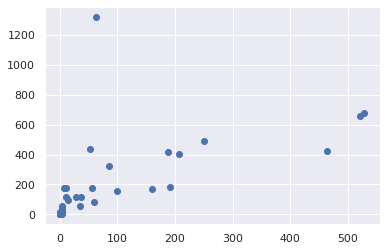

In [0]:
plt.scatter(x = df['Brain'], y = df['Body'])

In [0]:
random_num = np.random.randint(2,9)
print(random_num)

8


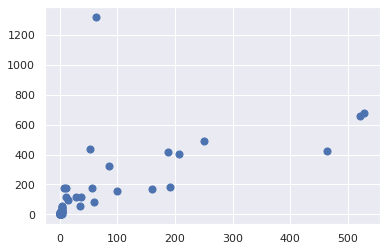

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=random_num,
                       cluster_std=0.60, random_state=0)
plt.scatter(df['Brain'], df['Body'], s=50);

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

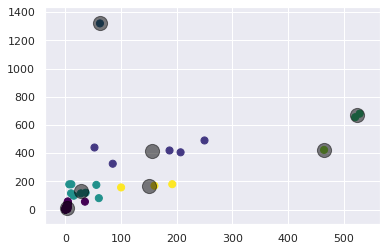

In [0]:
plt.scatter(df['Brain'], df['Body'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [0]:
from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_)

0.718599225969102

In [0]:
score_list_i=[]
score_list_value=[]

for i in range(2,20):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  y_kmeans = kmeans.predict(df)
  score_list_i.append(i)
  score_list_value.append(silhouette_score(df, kmeans.labels_))

Text(0, 0.5, 'silhouette score')

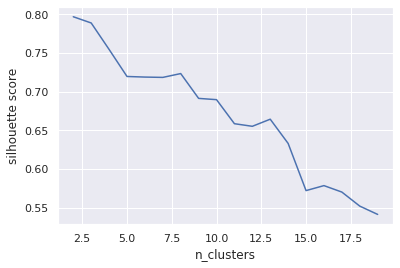

In [0]:
plt.plot(score_list_i,score_list_value)
plt.xlabel("n_clusters")
plt.ylabel("silhouette score")

Let's try UCI 
Online Retail II Data Set
https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

 https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/online_retail_II/online_retail_II-small3.csv")

In [0]:
df

,Quantity,Price
0,1,339.020
1,1,337.230
2,124,336.520
3,167,334.710
4,210,334.160
...,...,...
6363,900,0.040
6364,500,0.040
6365,200,0.040
6366,100,0.040


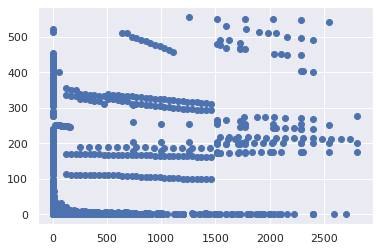

In [0]:
plt.scatter(df['Quantity'],df['Price'])

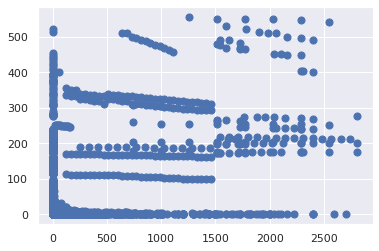

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=random_num,
                       cluster_std=0.60, random_state=0)
plt.scatter(df['Quantity'], df['Price'], s=50);

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

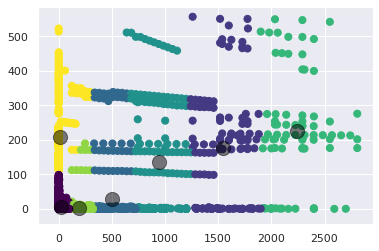

In [0]:
plt.scatter(df['Quantity'], df['Price'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [0]:
from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_)

0.6540622172796264

In [0]:
score_list_i=[]
score_list_value=[]

for i in range(2,20):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  y_kmeans = kmeans.predict(df)
  score_list_i.append(i)
  score_list_value.append(silhouette_score(df, kmeans.labels_))

Text(0, 0.5, 'silhouette score')

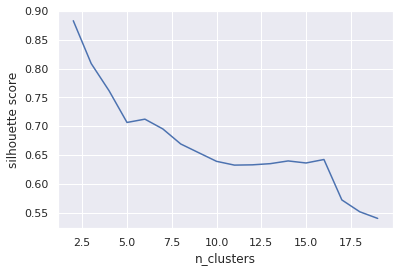

In [0]:
plt.plot(score_list_i,score_list_value)
plt.xlabel("n_clusters")
plt.ylabel("silhouette score")